Dataset Preview:
   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39       1               4               12                  3   
2   48       0               2                3                  2   
3   34       1               2                5                  2   
4   30       0               1                6                  1   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            26.783828              48          78                91   
1            25.862694              35          68                80   
2             9.920805              20          67                13   
3             6.407751              36          27                70   
4            43.105343              23          52                85   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1                    2               1  
2     

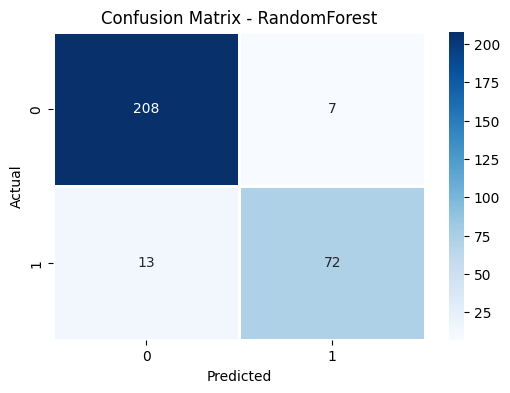

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import f1_score, roc_auc_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 🔹 Load the dataset
df = pd.read_csv(r"C:\Users\harik\Documents\PAPERPRESENTATION\SHAP AND LIME\Bias-Mitigation-using-SHAP-and-LIME-in-Recruitment-using-Machine-Learning\recruitment_data.csv")

# 🔹 Display the first few rows
print("Dataset Preview:")
print(df.head())

# 🔹 Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 🔹 Define the features (X) and the target variable (y)
X = df.drop('HiringDecision', axis=1)  # Drop the target column
y = df['HiringDecision']  # Target column

# 🔹 Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Initialize the RandomForest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# 🔹 Train the model
rfc.fit(X_train_scaled, y_train)

# 🔹 Evaluate the model
y_pred = rfc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# 🔹 Print results
print(f"\n🔹 Accuracy of RandomForestClassifier: {accuracy:.2f}")
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# 🔹 Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForest")
plt.show()


In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\harik\Documents\PAPERPRESENTATION\SHAP AND LIME\Bias-Mitigation-using-SHAP-and-LIME-in-Recruitment-using-Machine-Learning\recruitment_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset with bold headers
print("\033[1mDataset Preview:\033[0m")
print(df.head().to_string(index=False, header=[f"\033[1m{col}\033[0m" for col in df.columns]))

# Print the data type
print("\033[1mData Type:\033[0m")
print(df.dtypes)

# Print the number of unique values in each column with bold column names
print("\n\033[1mNumber of unique values in each column:\033[0m")
for col in df.columns:
    print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

Dataset Preview:
Age Gender EducationLevel ExperienceYears PreviousCompanies DistanceFromCompany InterviewScore SkillScore PersonalityScore RecruitmentStrategy HiringDecision
         26              1                      2                       0                         3                   26.783828                     48                 78                       91                           1                      1
         39              1                      4                      12                         3                   25.862694                     35                 68                       80                           2                      1
         48              0                      2                       3                         2                    9.920805                     20                 67                       13                           2                      0
         34              1                      2                       5              

In this step, we can analyse that Gender, Education Level, RecruitmentStrategy and 
HiringDecisin have 4 or less unique values in each of their respective column. As per the dataset, it is a numerical feature. It would be more insightful for us to convert these numerical values into categorical values. 2

In [3]:
# Convert Gender, RecruitmentStrategy, and EducationLevel to categorical data types
df['Gender'] = df['Gender'].astype('category')
df['RecruitmentStrategy'] = df['RecruitmentStrategy'].astype('category')
df['EducationLevel'] = df['EducationLevel'].astype('category')
df['HiringDecision'] = df['HiringDecision'].astype('category')

# Verify the changes
print("\nUpdated data types:")
print(df.dtypes)

# Confirmation message
print("\nConfirmation: 'Gender', 'RecruitmentStrategy', and 'EducationLevel' have been successfully converted to categorical data types.")


Updated data types:
Age                       int64
Gender                 category
EducationLevel         category
ExperienceYears           int64
PreviousCompanies         int64
DistanceFromCompany     float64
InterviewScore            int64
SkillScore                int64
PersonalityScore          int64
RecruitmentStrategy    category
HiringDecision         category
dtype: object

Confirmation: 'Gender', 'RecruitmentStrategy', and 'EducationLevel' have been successfully converted to categorical data types.


In [4]:
# Display data shape
print("\033[1mData Shape:\033[0m")
print(df.shape)

# Display data frame
print("\n\033[1mData Frame:\033[0m")
print(df.info())

# List categorical and numerical features
categorical_features = df.select_dtypes(include=['category']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n\033[1mCategorical Features:\033[0m")
print(categorical_features)
print(f"\033[1mNumber of Categorical Features:\033[0m {len(categorical_features)}")

print("\n\033[1mNumerical Features:\033[0m")
print(numerical_features)
print(f"\033[1mNumber of Numerical Features:\033[0m {len(numerical_features)}")

# Number of missing values
print("\n\033[1mNumber of Missing Values:\033[0m")
print(df.isnull().sum().sum())

# Number of duplicate rows
print("\n\033[1mNumber of Duplicate Rows:\033[0m")
print(df.duplicated().sum())

Data Shape:
(1500, 11)

Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1500 non-null   int64   
 1   Gender               1500 non-null   category
 2   EducationLevel       1500 non-null   category
 3   ExperienceYears      1500 non-null   int64   
 4   PreviousCompanies    1500 non-null   int64   
 5   DistanceFromCompany  1500 non-null   float64 
 6   InterviewScore       1500 non-null   int64   
 7   SkillScore           1500 non-null   int64   
 8   PersonalityScore     1500 non-null   int64   
 9   RecruitmentStrategy  1500 non-null   category
 10  HiringDecision       1500 non-null   category
dtypes: category(4), float64(1), int64(6)
memory usage: 88.6 KB
None

Categorical Features:
['Gender', 'EducationLevel', 'RecruitmentStrategy', 'HiringDecision']
Number of Categorical Features: 

In [5]:
# Function to identify outliers using the IQR method
def identify_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Identify outliers in the dataset
outliers = identify_outliers(df)

# Print the outliers for each column in a statement
for column, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f"The following outliers were identified in the '{column}' column:")
        print(outlier_values.tolist())
    else:
        print(f"No outliers were identified in the '{column}' column.")
    print("\n" + "="*60 + "\n")



No outliers were identified in the 'Age' column.


No outliers were identified in the 'ExperienceYears' column.


No outliers were identified in the 'PreviousCompanies' column.


No outliers were identified in the 'DistanceFromCompany' column.


No outliers were identified in the 'InterviewScore' column.


No outliers were identified in the 'SkillScore' column.


No outliers were identified in the 'PersonalityScore' column.




In [6]:
# Summary statistics for numerical features
numerical_summary = df.describe()

# Summary statistics for categorical features
categorical_summary = df.describe(include=['category'])

print("\033[1mSummary Statistics for Numerical Features:\033[0m")
print(numerical_summary)

print("\n\033[1mSummary Statistics for Categorical Features:\033[0m")
print(categorical_summary)

Summary Statistics for Numerical Features:
               Age  ExperienceYears  PreviousCompanies  DistanceFromCompany  \
count  1500.000000      1500.000000         1500.00000          1500.000000   
mean     35.148667         7.694000            3.00200            25.505379   
std       9.252728         4.641414            1.41067            14.567151   
min      20.000000         0.000000            1.00000             1.031376   
25%      27.000000         4.000000            2.00000            12.838851   
50%      35.000000         8.000000            3.00000            25.502239   
75%      43.000000        12.000000            4.00000            37.737996   
max      50.000000        15.000000            5.00000            50.992462   

       InterviewScore   SkillScore  PersonalityScore  
count     1500.000000  1500.000000       1500.000000  
mean        50.564000    51.116000         49.387333  
std         28.626215    29.353563         29.353201  
min          0.000000    

Features sorted by correlation with HiringDecision:
HiringDecision         1.000000
SkillScore             0.203668
PersonalityScore       0.169177
InterviewScore         0.146064
ExperienceYears        0.122494
PreviousCompanies      0.044025
Age                    0.001850
DistanceFromCompany   -0.016791
Name: HiringDecision, dtype: float64


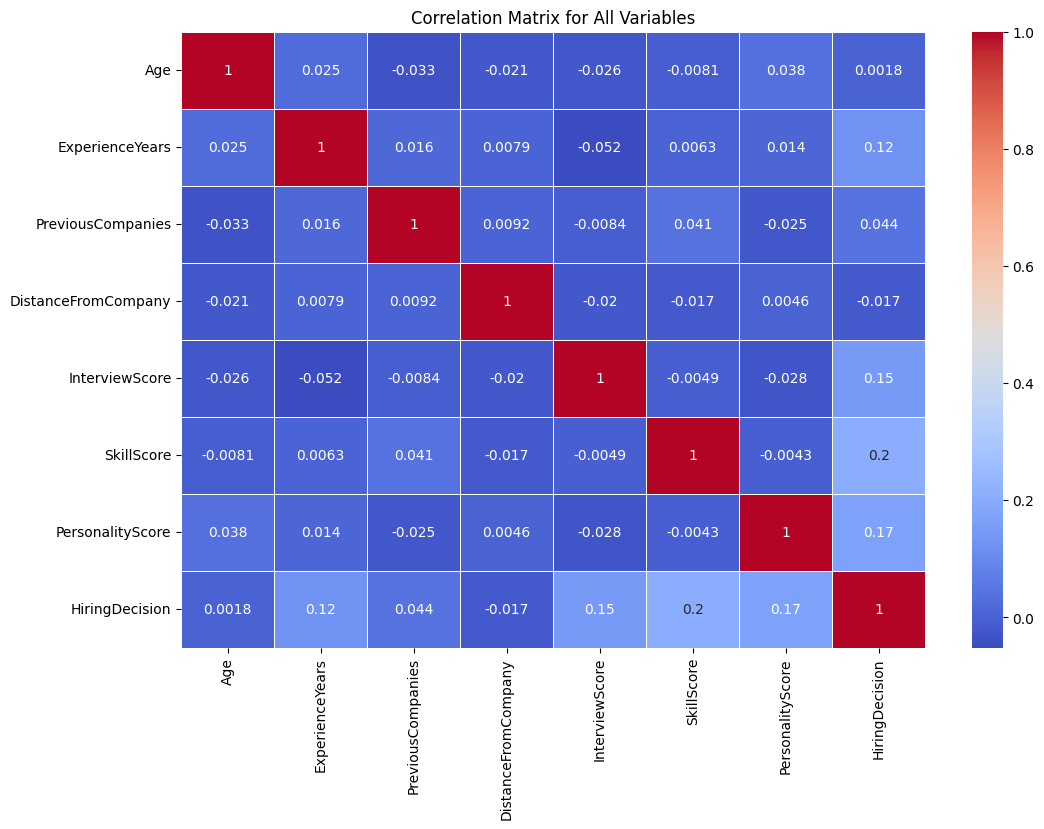

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the target variable 'HiringDecision' to numerical if it's categorical
df['HiringDecision'] = pd.to_numeric(df['HiringDecision'], errors='coerce')

# Select numerical features from the dataset
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for numerical features
numerical_corr_matrix = numerical_features.corr()

# Sort the correlations of features with the target variable 'HiringDecision' from highest to lowest
correlation_with_target = numerical_corr_matrix['HiringDecision'].sort_values(ascending=False)

# Display the sorted correlations
print("Features sorted by correlation with HiringDecision:")
print(correlation_with_target)

# Plot the correlation matrix for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for All Variables')
plt.show()


It is necessary for us to do a correlation amtrix/heatmap to understand which numerical features are highly correlated to the target variable, HiringDecision. From this correlation heatmap, we can now do Explotorary Data Analysis for the top 3 features, EducationLevel, 
SkillScor & P
PersonalitySco.77

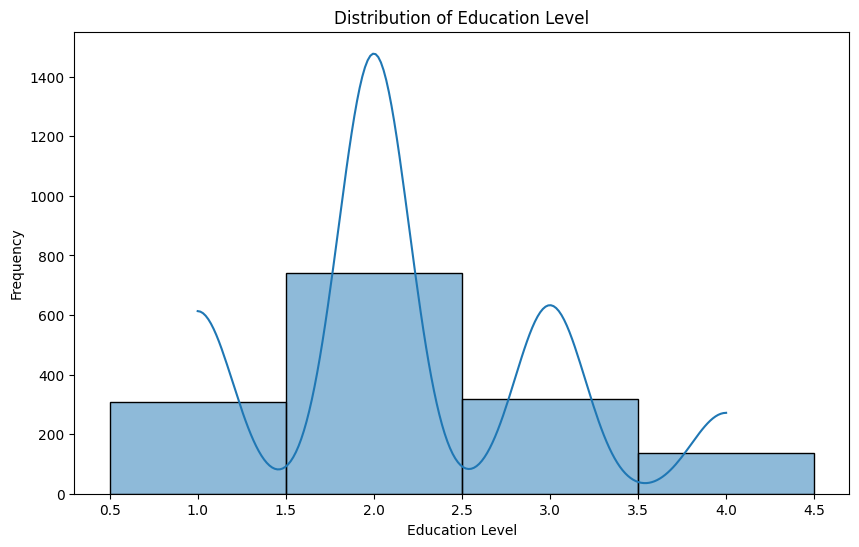

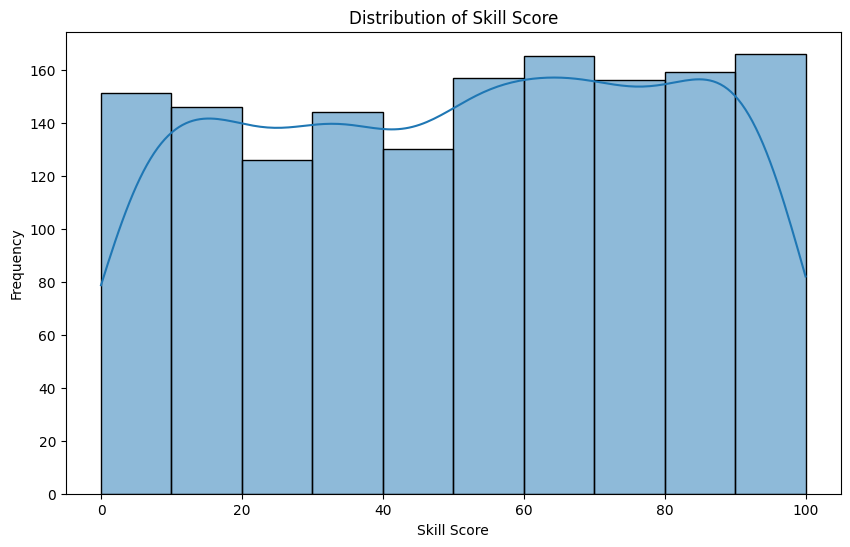

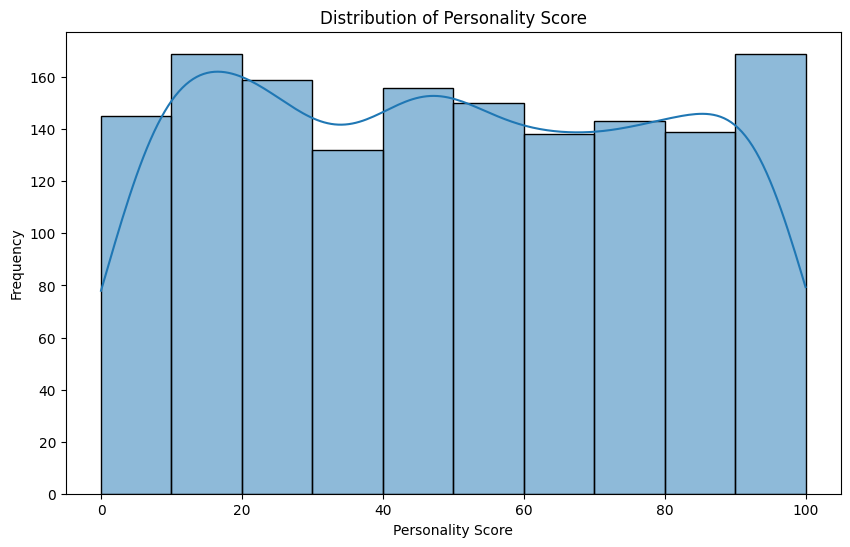

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with KDE for EducationLevel
plt.figure(figsize=(10, 6))
sns.histplot(df['EducationLevel'], bins=10, kde=True)
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

# Histogram with KDE for SkillScore
plt.figure(figsize=(10, 6))
sns.histplot(df['SkillScore'], bins=10, kde=True)
plt.title('Distribution of Skill Score')
plt.xlabel('Skill Score')
plt.ylabel('Frequency')
plt.show()

# Histogram with KDE for PersonalityScore
plt.figure(figsize=(10, 6))
sns.histplot(df['PersonalityScore'], bins=10, kde=True)
plt.title('Distribution of Personality Score')
plt.xlabel('Personality Score')
plt.ylabel('Frequency')
plt.show()


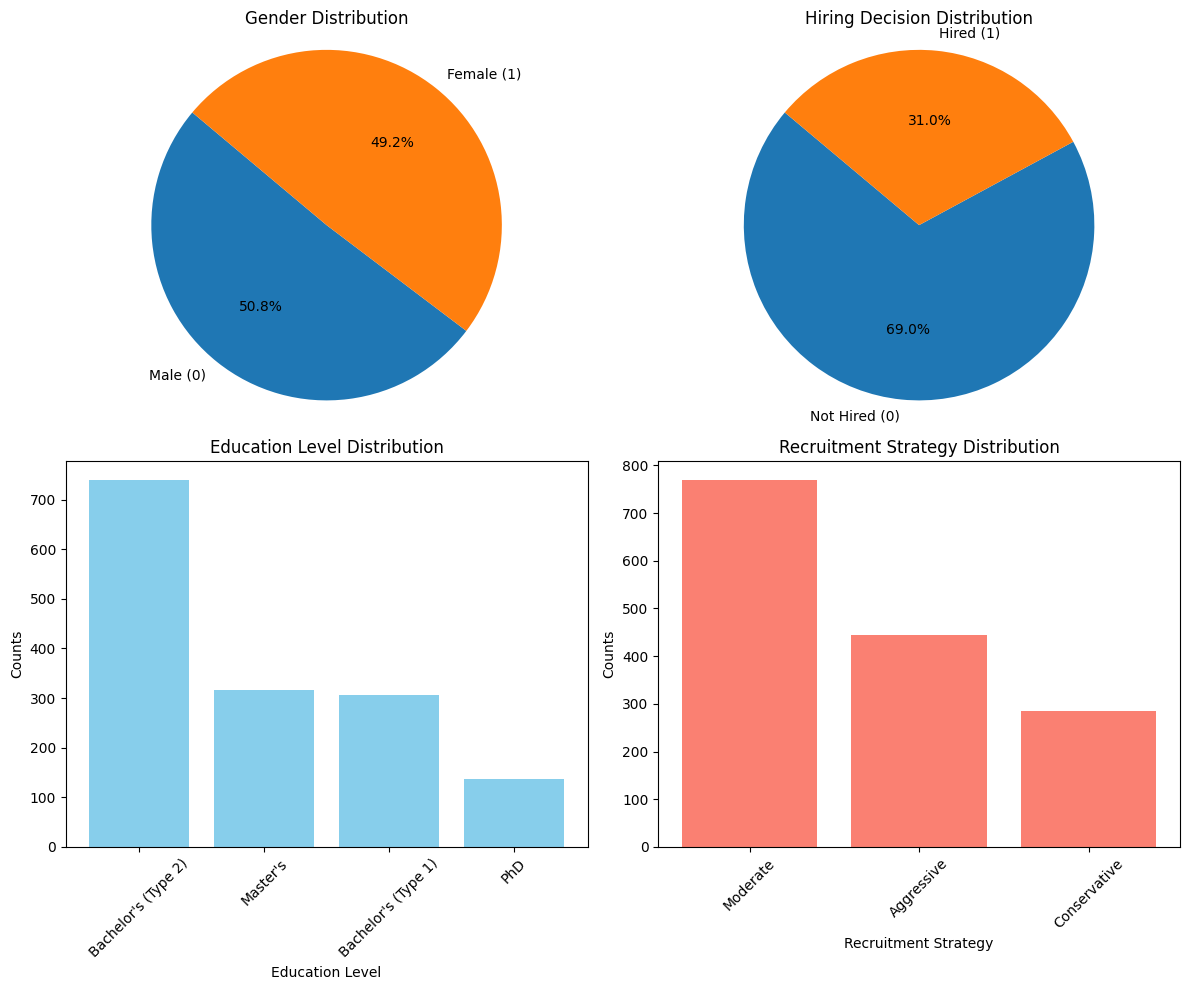

In [9]:
import matplotlib.pyplot as plt

# Pie chart for Gender distribution
gender_counts = df['Gender'].value_counts()

# Mapping for Gender
gender_labels = {0: 'Male (0)', 1: 'Female (1)'}
gender_counts.index = gender_counts.index.map(gender_labels)

plt.figure(figsize=(12, 10))

# Pie Chart for Gender
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Pie chart for Hiring Decision distribution
hiring_decision_counts = df['HiringDecision'].value_counts()

# Mapping for Hiring Decision
hiring_labels = {0: 'Not Hired (0)', 1: 'Hired (1)'}
hiring_decision_counts.index = hiring_decision_counts.index.map(hiring_labels)

# Pie Chart for Hiring Decision
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
plt.pie(hiring_decision_counts, labels=hiring_decision_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Hiring Decision Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Bar chart for Education Level distribution
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
education_counts = df['EducationLevel'].value_counts()

# Mapping for Education Level
education_labels = {
    1: "Bachelor's (Type 1)",
    2: "Bachelor's (Type 2)",
    3: "Master's",
    4: "PhD"
}
education_counts.index = education_counts.index.map(education_labels)

plt.bar(education_counts.index, education_counts.values, color='skyblue')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Counts')
plt.xticks(rotation=45)

# Bar chart for Recruitment Strategy distribution
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
recruitment_counts = df['RecruitmentStrategy'].value_counts()

# Mapping for Recruitment Strategy
recruitment_labels = {
    1: "Aggressive",
    2: "Moderate",
    3: "Conservative"
}
recruitment_counts.index = recruitment_counts.index.map(recruitment_labels)

plt.bar(recruitment_counts.index, recruitment_counts.values, color='salmon')
plt.title('Recruitment Strategy Distribution')
plt.xlabel('Recruitment Strategy')
plt.ylabel('Counts')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [10]:
# Define the features (X) and the target variable (y)
X = df.drop('HiringDecision', axis=1)  # Drop the target column
y = df['HiringDecision']  # Target column

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaler to scale the features
scaler = StandardScaler()

# Fit the scaler only on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the scaled data
print("Scaled Training Data (First 5 Rows):")
print(X_train_scaled[:5])

Scaled Training Data (First 5 Rows):
[[ 0.6457784   1.0168079   0.93165673 -0.79528254 -1.40574422  0.07718799
   0.34722025  0.99391022  0.17475903  0.14298599]
 [ 1.29707473  1.0168079   0.93165673 -1.00954815  0.01121761 -0.2057359
   0.76608358 -0.33002097  0.20881959  0.14298599]
 [ 0.86287717  1.0168079  -0.22448399  1.3473736   0.71969853  0.00299797
  -0.31598002 -0.49975573  0.17475903 -1.29888955]
 [-0.65681425 -0.98346994 -0.22448399  0.06177992  0.01121761  0.09564651
   1.0453258   0.07734248  1.02627293  1.58486153]
 [ 1.40562411  1.0168079  -0.22448399 -0.1524857   0.71969853 -0.79086217
  -0.80465391  0.68838764 -0.3361493   0.14298599]]


In [12]:
import os
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

# Set the number of threads for LightGBM, XGBoost, and CatBoost to avoid subprocess issues
os.environ["OMP_NUM_THREADS"] = "1"  # Limit OpenMP threads
os.environ["MKL_NUM_THREADS"] = "1"  # Limit MKL threads

# Initialize your models with limited threads
rfc = RandomForestClassifier(n_jobs=1)  # Limit threads for RandomForest
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier(n_jobs=1)  # Limit threads for ExtraTrees
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
lgr = LogisticRegression()
xgb_model = xgb.XGBClassifier(n_jobs=1)  # Limit threads for XGBoost
lgb_model = lgb.LGBMClassifier(n_jobs=1)  # Limit threads for LightGBM
cbc = CatBoostClassifier(thread_count=1, silent=True)  # Limit threads for CatBoost

# Fit each model to the training data
rfc.fit(X_train, y_train)
abc.fit(X_train_scaled, y_train)
etc.fit(X_train, y_train)
gbc.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)
lgr.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
lgb_model.fit(X_train_scaled, y_train)
cbc.fit(X_train, y_train)

# Define your model names and corresponding scores
names = ['RandomForest', 'AdaBoost', 'ExtraTrees', 'GradientBoosting', 'SVM', 'LogisticRegression', 'XGBoost', 'LightGBM', 'CatBoost']
scores = [rfc.score(X_test, y_test), 
          abc.score(X_test_scaled, y_test), 
          etc.score(X_test, y_test), 
          gbc.score(X_test_scaled, y_test), 
          svc.score(X_test_scaled, y_test), 
          lgr.score(X_test_scaled, y_test), 
          xgb_model.score(X_test_scaled, y_test), 
          lgb_model.score(X_test_scaled, y_test), 
          cbc.score(X_test, y_test)]  # Include CatBoost score

# Create DataFrame from the scores and sort them
dd = pd.DataFrame({"scores": scores}, index=names)
dd = dd.sort_values("scores", ascending=False)
dd["scores"] = round(dd["scores"], 2)

# Print confirmation that all models have been trained
print("All models (including boosting models) have been trained successfully.")


[LightGBM] [Info] Number of positive: 380, number of negative: 820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316667 -> initscore=-0.769133
[LightGBM] [Info] Start training from score -0.769133


CatBoostError: features data: pandas.DataFrame column 'Gender' has dtype 'category' but is not in  cat_features list

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Function to display classification report and ROC-AUC score for each model
def print_classification_report_and_roc_auc(model, model_name, X_test, y_test, scaled=True):
    if scaled:
        predictions = model.predict(X_test_scaled)
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_pred_proba = model.decision_function(X_test_scaled)
    else:
        predictions = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = model.decision_function(X_test)
    
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, predictions))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score for {model_name}: {roc_auc:.4f}")
    print("\n" + "="*60 + "\n")

# Ensure all models are correctly instantiated and fitted
cbc.fit(X_train_scaled, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train_scaled, y_train)
etc.fit(X_train, y_train)
gbc.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)
lgr.fit(X_train_scaled, y_train)
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
lgb_model = LGBMClassifier()
lgb_model.fit(X_train_scaled, y_train)

# Generate classification reports and ROC-AUC scores for all models
print_classification_report_and_roc_auc(cbc, "CatBoost", X_test_scaled, y_test)  # Added CatBoost
print_classification_report_and_roc_auc(rfc, "Random Forest", X_test, y_test, scaled=False)
print_classification_report_and_roc_auc(abc, "AdaBoost", X_test_scaled, y_test)
print_classification_report_and_roc_auc(etc, "Extra Trees", X_test, y_test, scaled=False)
print_classification_report_and_roc_auc(gbc, "Gradient Boosting", X_test_scaled, y_test)
print_classification_report_and_roc_auc(svc, "Support Vector Machine", X_test_scaled, y_test)
print_classification_report_and_roc_auc(lgb_model, "LightGBM", X_test_scaled, y_test)

[LightGBM] [Info] Number of positive: 380, number of negative: 820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316667 -> initscore=-0.769133
[LightGBM] [Info] Start training from score -0.769133
Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       215
           1       0.93      0.91      0.92        85

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300

ROC-AUC Score for CatBoost: 0.9292


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0    

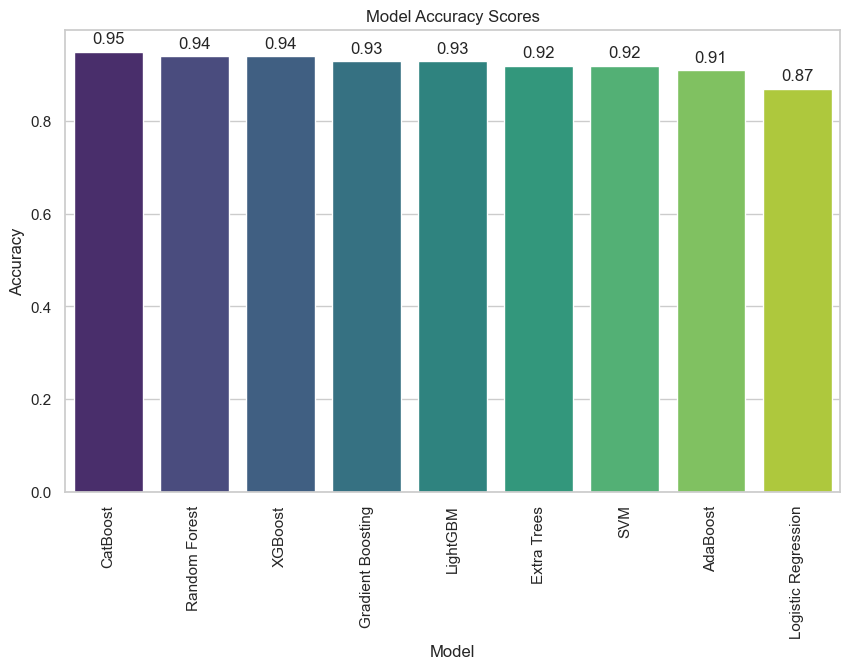

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Accuracy scores from the classification reports
accuracy_scores = {
    'CatBoost': 0.95,
    'Random Forest': 0.94,
    'XGBoost': 0.94,
    'Gradient Boosting': 0.93,
    'LightGBM': 0.93,
    'Extra Trees': 0.92,
    'SVM': 0.92,
    'AdaBoost': 0.91,
    'Logistic Regression': 0.87
}

# Create a DataFrame from the accuracy scores
df_accuracy = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy in descending order
df_accuracy = df_accuracy.sort_values(by='Accuracy', ascending=False)

# Plot the accuracy scores in a vertical bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=df_accuracy, palette='viridis')

# Add the accuracy scores on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()


[LightGBM] [Info] Number of positive: 380, number of negative: 820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316667 -> initscore=-0.769133
[LightGBM] [Info] Start training from score -0.769133


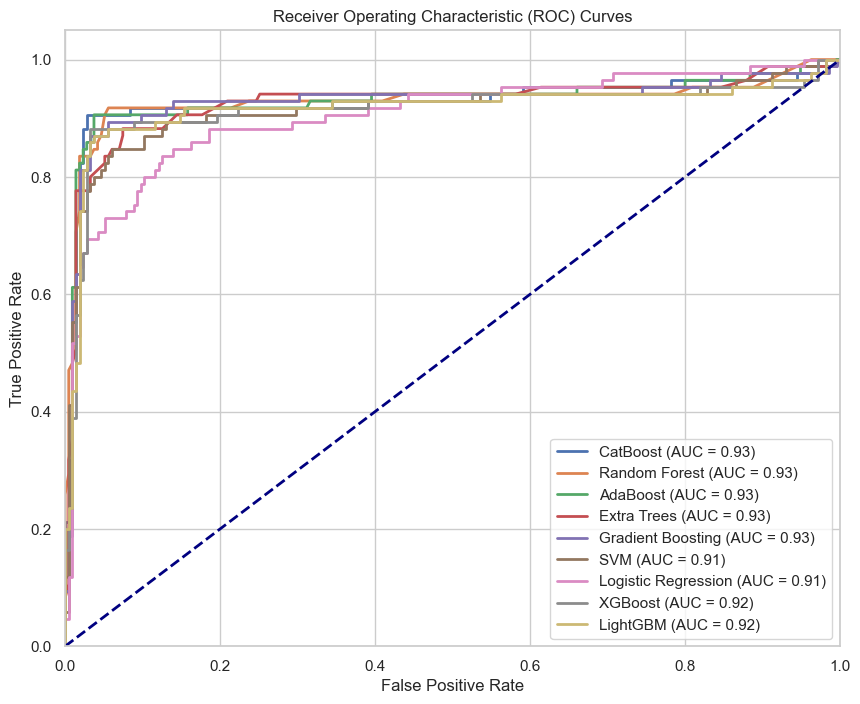

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve for each model
def plot_roc_curve(model, X_test, y_test, model_name, scaled=True):
    if scaled:
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Ensure all models are correctly instantiated and fitted
cbc.fit(X_train_scaled, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train_scaled, y_train)
etc.fit(X_train, y_train)
gbc.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)
lgr.fit(X_train_scaled, y_train)
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
lgb_model = LGBMClassifier()
lgb_model.fit(X_train_scaled, y_train)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

plot_roc_curve(cbc, X_test_scaled, y_test, 'CatBoost')
plot_roc_curve(rfc, X_test, y_test, 'Random Forest', scaled=False)
plot_roc_curve(abc, X_test_scaled, y_test, 'AdaBoost')
plot_roc_curve(etc, X_test, y_test, 'Extra Trees', scaled=False)
plot_roc_curve(gbc, X_test_scaled, y_test, 'Gradient Boosting')
plot_roc_curve(svc, X_test_scaled, y_test, 'SVM')
plot_roc_curve(lgr, X_test_scaled, y_test, 'Logistic Regression')
plot_roc_curve(xgb_model, X_test_scaled, y_test, 'XGBoost')
plot_roc_curve(lgb_model, X_test_scaled, y_test, 'LightGBM')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


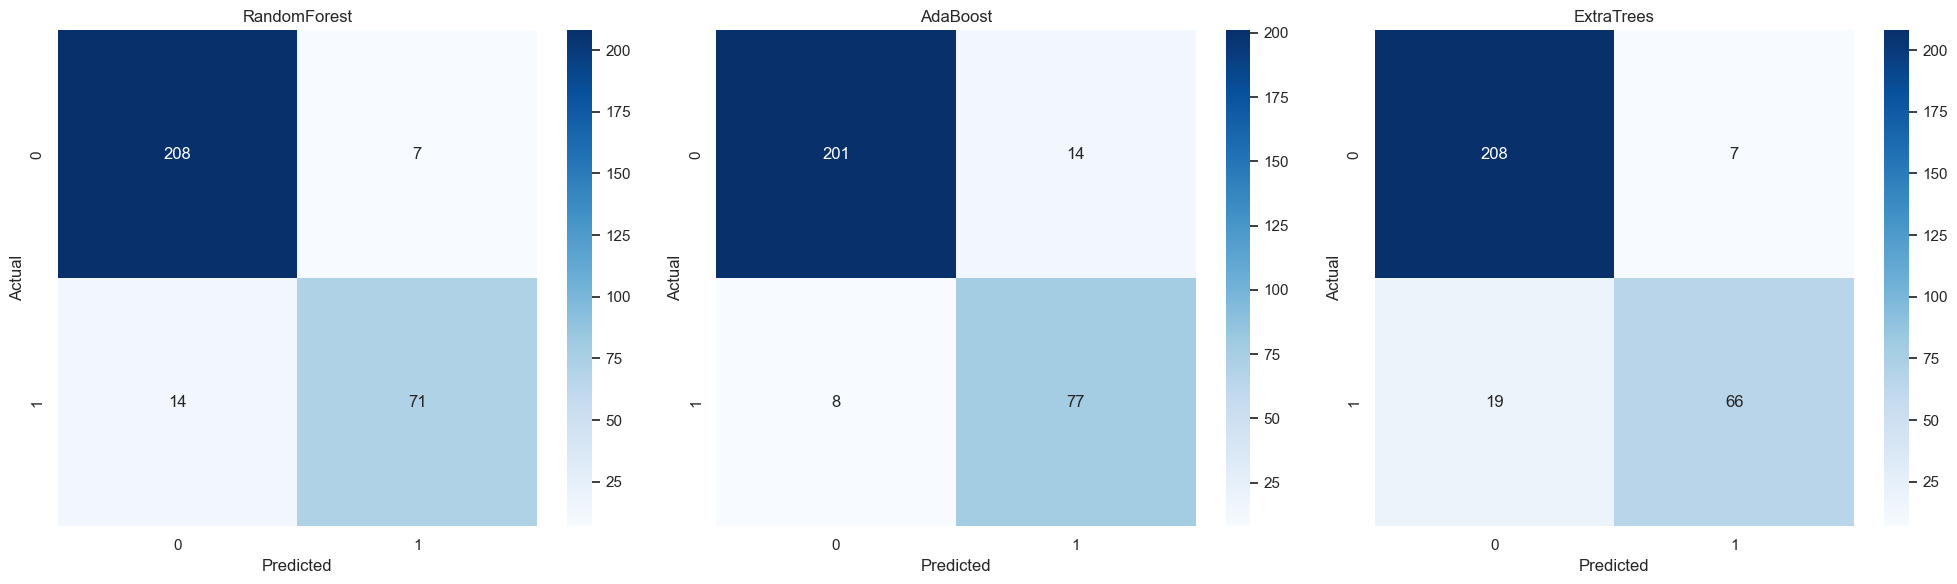

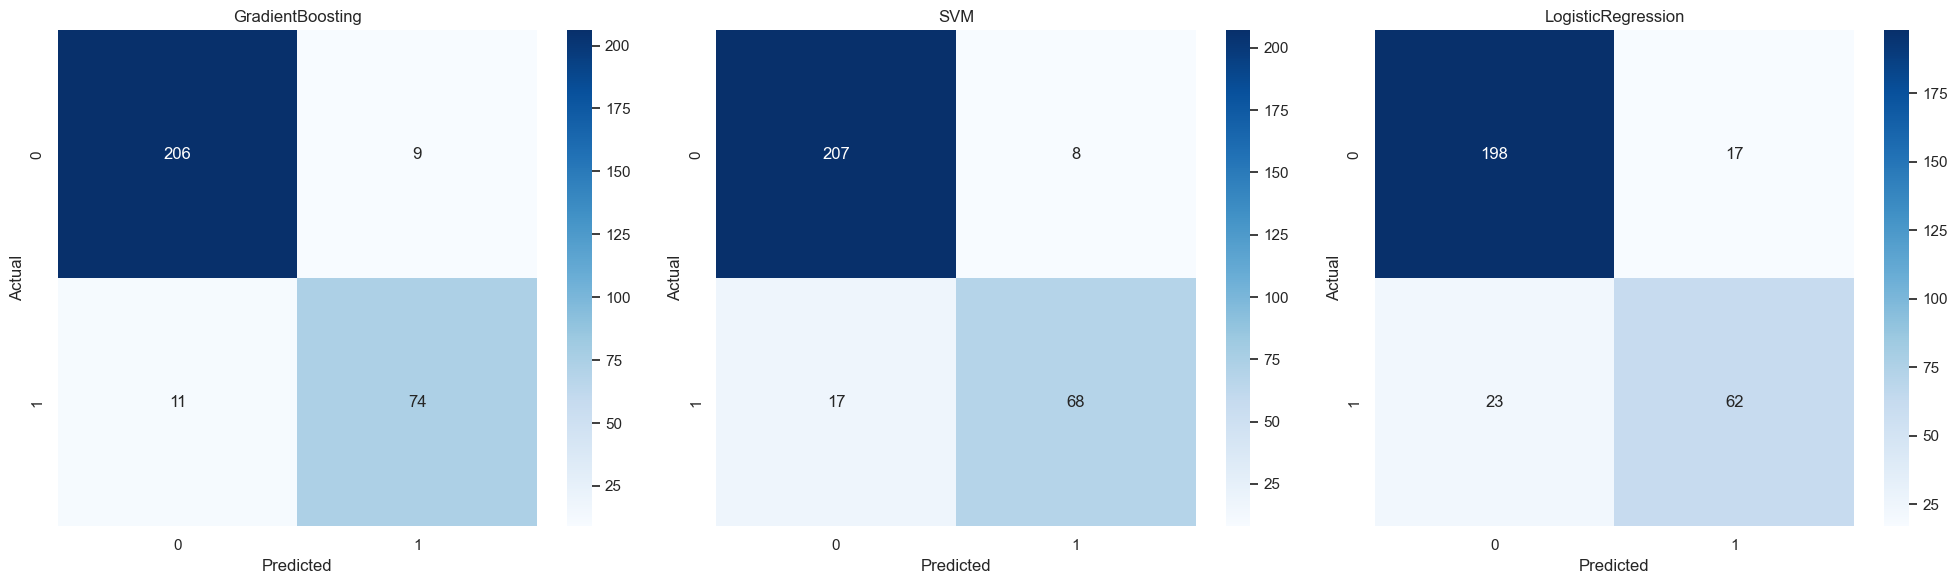

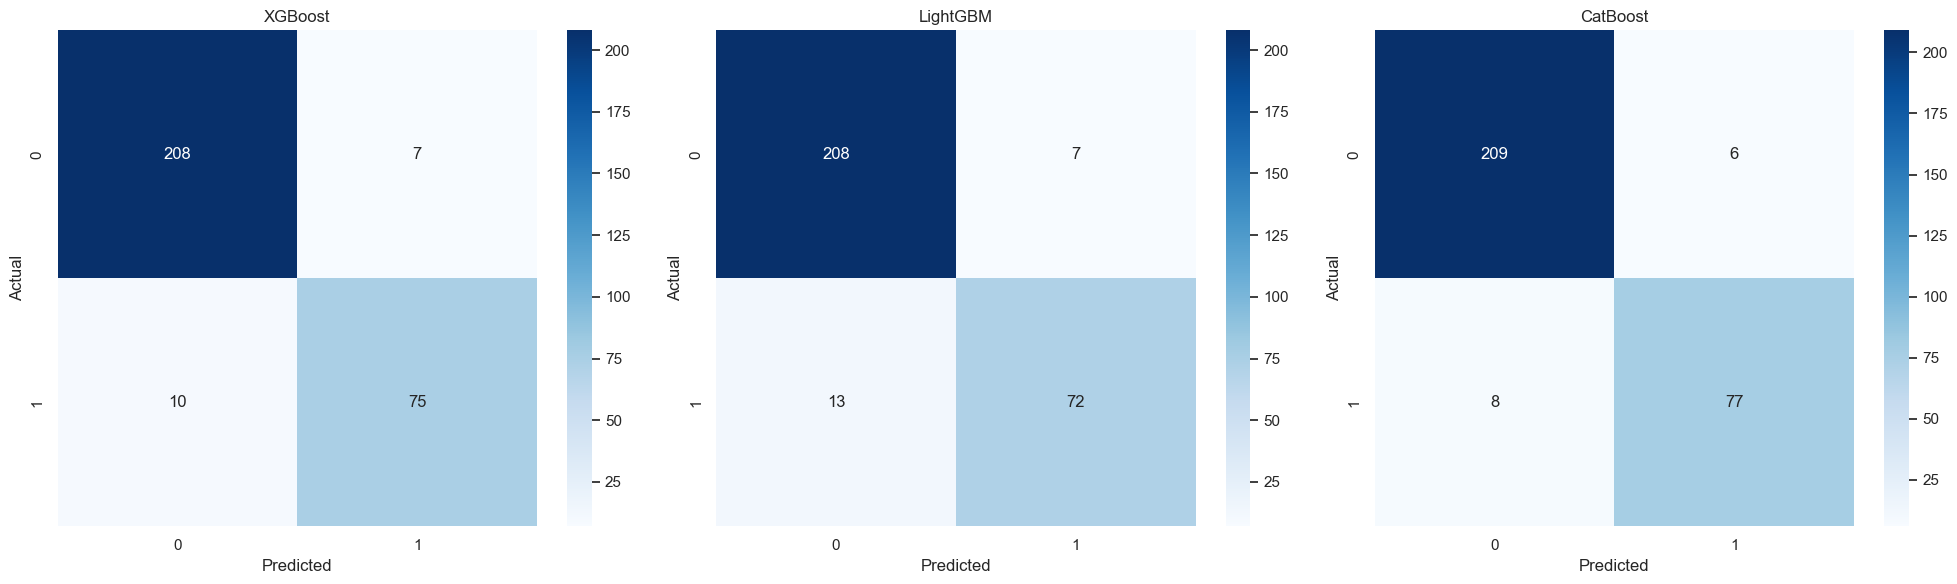

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming `X_test` and `y_test` are already defined and models are trained
cms = {
    'RandomForest': confusion_matrix(y_test, rfc.predict(X_test)),
    'AdaBoost': confusion_matrix(y_test, abc.predict(X_test_scaled)),
    'ExtraTrees': confusion_matrix(y_test, etc.predict(X_test)),
    'GradientBoosting': confusion_matrix(y_test, gbc.predict(X_test_scaled)),
    'SVM': confusion_matrix(y_test, svc.predict(X_test_scaled)),
    'LogisticRegression': confusion_matrix(y_test, lgr.predict(X_test_scaled)),
    'XGBoost': confusion_matrix(y_test, xgb_model.predict(X_test_scaled)),  # Ensure xgb_model is defined
    'LightGBM': confusion_matrix(y_test, lgb_model.predict(X_test_scaled)),  # Ensure lgb_model is defined
    'CatBoost': confusion_matrix(y_test, cbc.predict(X_test_scaled))  # Ensure cbc is defined
}

index = 0
total_models = len(cms)
cols = 3  # Number of columns in the grid

# Calculate the number of rows needed
rows = (total_models + cols - 1) // cols

# Plot in a grid
for i in range(rows):
    fig, axes = plt.subplots(ncols=cols, figsize=(20, 6))  # Adjust the size if needed
    for j in range(cols):
        if index < total_models:
            model_name = list(cms.keys())[index]
            sns.heatmap(cms[model_name], annot=True, fmt='d', ax=axes[j], cmap='Blues')
            axes[j].set_title(model_name)
            axes[j].set_xlabel('Predicted')
            axes[j].set_ylabel('Actual')
            index += 1
        else:
            axes[j].axis('off')  # Turn off the axis if there are no more models to plot
    plt.tight_layout()
    plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8]
}

param_grid_cbc = {
    'iterations': [50, 100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3]
}

# Initialize models
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cbc = CatBoostClassifier(random_state=42, verbose=0)

# GridSearchCV for RandomForestClassifier
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5, n_jobs=-1, verbose=2)
grid_search_rfc.fit(X_train_scaled, y_train)

# GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

# GridSearchCV for CatBoost
grid_search_cbc = GridSearchCV(estimator=cbc, param_grid=param_grid_cbc, cv=5, n_jobs=-1, verbose=2)
grid_search_cbc.fit(X_train_scaled, y_train)

# Print best parameters and scores for GridSearchCV
print("GridSearchCV Best parameters for RandomForest:", grid_search_rfc.best_params_)
print("GridSearchCV Best score for RandomForest:", grid_search_rfc.best_score_)

print("GridSearchCV Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("GridSearchCV Best score for XGBoost:", grid_search_xgb.best_score_)

print("GridSearchCV Best parameters for CatBoost:", grid_search_cbc.best_params_)
print("GridSearchCV Best score for CatBoost:", grid_search_cbc.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
GridSearchCV Best parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
GridSearchCV Best score for RandomForest: 0.9241666666666667
GridSearchCV Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
GridSearchCV Best score for XGBoost: 0.9316666666666666
GridSearchCV Best parameters for CatBoost: {'depth': 8, 'iterations': 50, 'l2_leaf_reg': 3, 'learning_rate': 0.2}
GridSearchCV Best score for CatBoost: 0.9541666666666668


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8]
}

param_grid_cbc = {
    'iterations': [50, 100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3]
}

# Initialize models
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cbc = CatBoostClassifier(random_state=42, verbose=0)

# RandomizedSearchCV for RandomForestClassifier
random_search_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid_rfc, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_rfc.fit(X_train_scaled, y_train)

# RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_xgb.fit(X_train_scaled, y_train)

# RandomizedSearchCV for CatBoost
random_search_cbc = RandomizedSearchCV(estimator=cbc, param_distributions=param_grid_cbc, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_cbc.fit(X_train_scaled, y_train)

# Print best parameters and scores for RandomizedSearchCV
print("RandomizedSearchCV Best parameters for RandomForest:", random_search_rfc.best_params_)
print("RandomizedSearchCV Best score for RandomForest:", random_search_rfc.best_score_)

print("RandomizedSearchCV Best parameters for XGBoost:", random_search_xgb.best_params_)
print("RandomizedSearchCV Best score for XGBoost:", random_search_xgb.best_score_)

print("RandomizedSearchCV Best parameters for CatBoost:", random_search_cbc.best_params_)
print("RandomizedSearchCV Best score for CatBoost:", random_search_cbc.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomizedSearchCV Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
RandomizedSearchCV Best score for RandomForest: 0.9225
RandomizedSearchCV Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.2}
RandomizedSearchCV Best score for XGBoost: 0.9291666666666668
RandomizedSearchCV Best parameters for CatBoost: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 8}
RandomizedSearchCV Best score for CatBoost: 0.9541666666666666


Performance Metrics for RandomForest:
Accuracy: 0.94
ROC-AUC: 0.9154582763337893
Confusion Matrix:
 [[209   6]
 [ 12  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       215
           1       0.92      0.86      0.89        85

    accuracy                           0.94       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.94      0.94      0.94       300



Cross-Validation Scores for RandomForest: [0.9125     0.91666667 0.94166667 0.925      0.9       ]
Mean CV Score for RandomForest: 0.9191666666666667




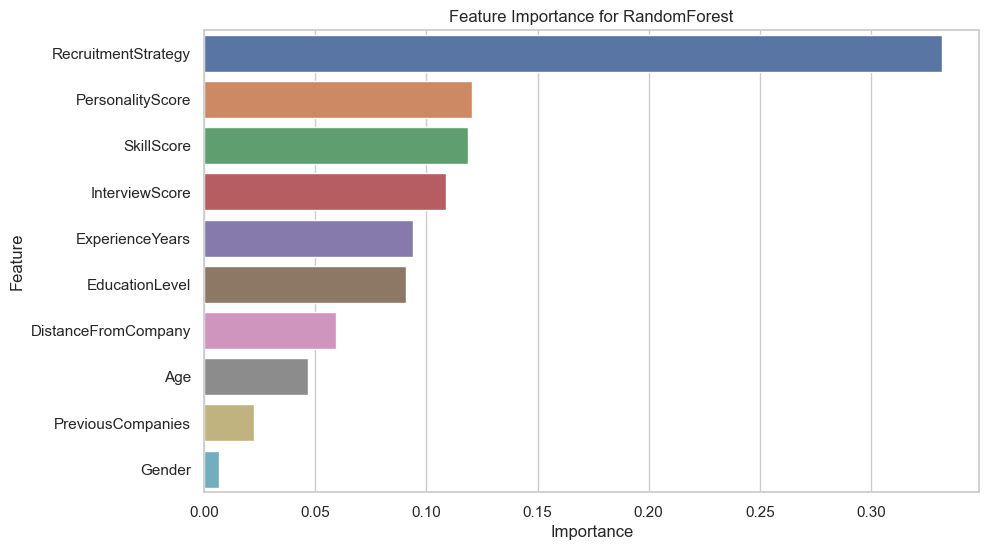

Performance Metrics for XGBoost:
Accuracy: 0.9433333333333334
ROC-AUC: 0.9248974008207934
Confusion Matrix:
 [[208   7]
 [ 10  75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       215
           1       0.91      0.88      0.90        85

    accuracy                           0.94       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.94      0.94      0.94       300



Cross-Validation Scores for XGBoost: [0.92916667 0.9375     0.9375     0.93333333 0.86666667]
Mean CV Score for XGBoost: 0.9208333333333332




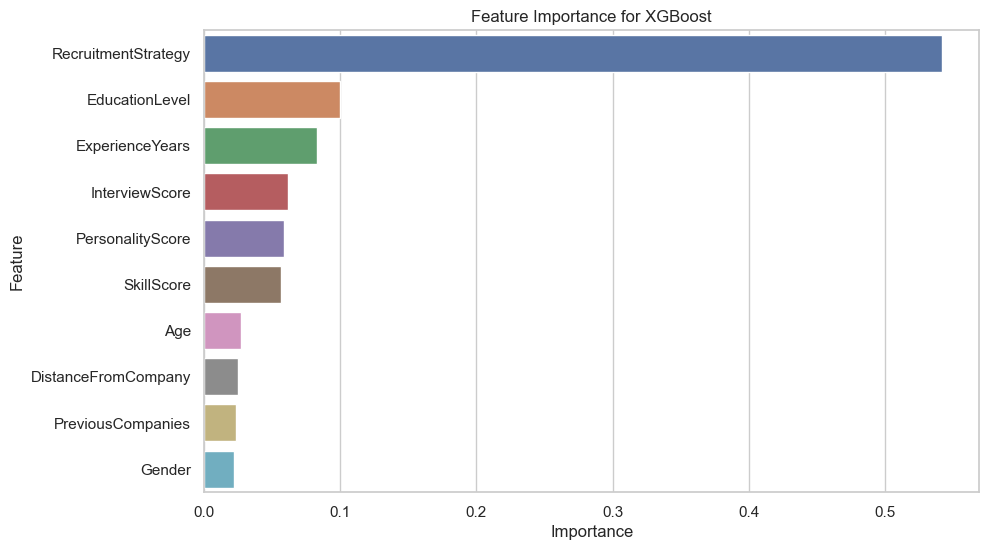

Performance Metrics for CatBoost:
Accuracy: 0.96
ROC-AUC: 0.9436388508891929
Confusion Matrix:
 [[211   4]
 [  8  77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       215
           1       0.95      0.91      0.93        85

    accuracy                           0.96       300
   macro avg       0.96      0.94      0.95       300
weighted avg       0.96      0.96      0.96       300



Cross-Validation Scores for CatBoost: [0.95416667 0.95416667 0.9625     0.94583333 0.95      ]
Mean CV Score for CatBoost: 0.9533333333333334




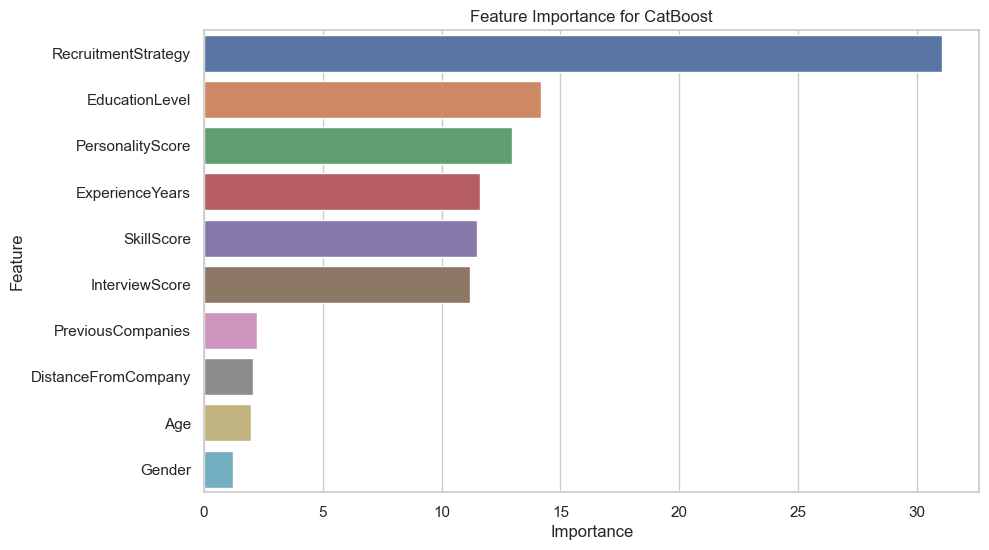

In [ ]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

# Evaluate the tuned models
best_rfc = grid_search_rfc.best_estimator_
best_xgb = grid_search_xgb.best_estimator_
best_cbc = grid_search_cbc.best_estimator_

models = {
    'RandomForest': best_rfc,
    'XGBoost': best_xgb,
    'CatBoost': best_cbc
}

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Performance Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Cross-Validation Scores for {model_name}:", cv_scores)
    print(f"Mean CV Score for {model_name}:", cv_scores.mean())
    print("\n" + "="*60 + "\n")

    # Feature importance
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Feature Importance for {model_name}')
        plt.show()

    # Save the model
    joblib.dump(model, f'{model_name}_best_model.pkl')


Dataset Preview:


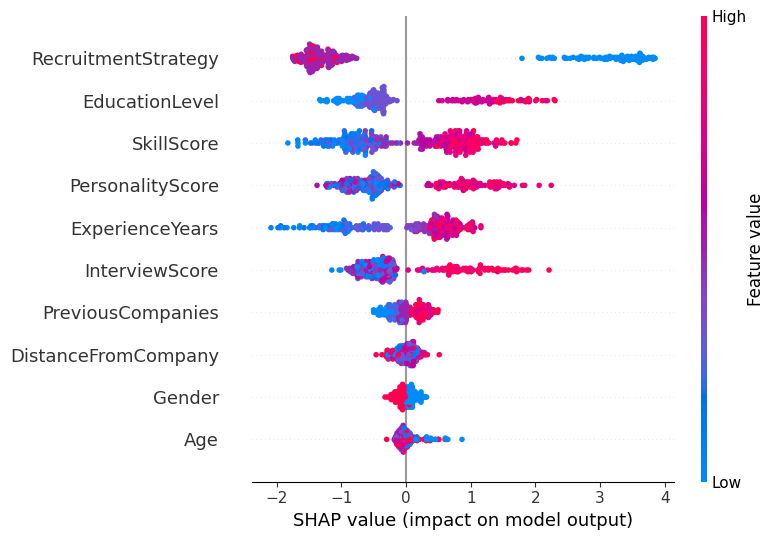

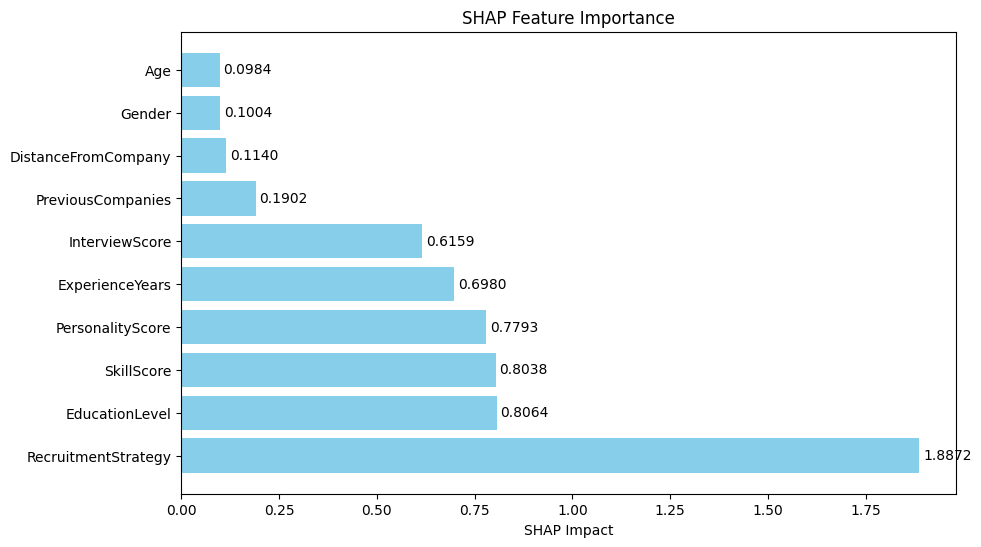


🔹 **SHAP Interpretation**:
The SHAP summary plot (Bee Swarm) shows how each feature influences the model’s prediction.
The SHAP bar chart ranks the features by importance.
Features with larger SHAP values have a bigger impact on HiringDecision.
Positive values push the decision towards hiring, while negative values push against hiring.

📊 **Top 5 Features by SHAP Impact**:
**RecruitmentStrategy** has a SHAP impact of 1.8872, making it one of the key drivers of hiring decisions.
**EducationLevel** has a SHAP impact of 0.8064, making it one of the key drivers of hiring decisions.
**SkillScore** has a SHAP impact of 0.8038, making it one of the key drivers of hiring decisions.
**PersonalityScore** has a SHAP impact of 0.7793, making it one of the key drivers of hiring decisions.
**ExperienceYears** has a SHAP impact of 0.6980, making it one of the key drivers of hiring decisions.

📊 **Top 10 Features by SHAP Impact**:
1. RecruitmentStrategy: SHAP Impact = 1.8872
2. EducationLevel: SHAP I

In [7]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier, Pool

# 1️⃣ Load the dataset
file_path = r"C:\Users\harik\Documents\PAPERPRESENTATION\SHAP AND LIME\Bias-Mitigation-using-SHAP-and-LIME-in-Recruitment-using-Machine-Learning\recruitment_data.csv"
df = pd.read_csv(file_path)
print("Dataset Preview:")

# 2️⃣ Define features (X) and target (y)
target_column = 'HiringDecision'  # Change this if your target column is different
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

# 3️⃣ Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled test data back to DataFrame with feature names
X_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# 5️⃣ Train the CatBoost model
cbc = CatBoostClassifier(verbose=0)
cbc.fit(X_train_scaled, y_train)

# 6️⃣ Get SHAP values for the entire dataset
explainer = shap.TreeExplainer(cbc)
shap_values = explainer.shap_values(X_test_scaled)

# 7️⃣ Generate SHAP Summary Plot (Bee Swarm)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_df, feature_names=X.columns)
plt.show()

# 8️⃣ Generate SHAP Feature Importance Bar Plot
feature_importance = np.abs(shap_values).mean(axis=0)
sorted_idx = np.argsort(feature_importance)[::-1]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center", color="skyblue")
plt.yticks(range(len(sorted_idx)), [X.columns[idx] for idx in sorted_idx])
plt.xlabel('SHAP Impact')
plt.title('SHAP Feature Importance')

# Annotate the bars with the SHAP impact scores
for i, (value, idx) in enumerate(zip(feature_importance[sorted_idx], sorted_idx)):
    plt.text(value + 0.01, i, f'{value:.4f}', va='center', fontsize=10, color='black')

plt.show()

# 9️⃣ Text Explanation of SHAP Results
print("\n🔹 **SHAP Interpretation**:")
print("The SHAP summary plot (Bee Swarm) shows how each feature influences the model’s prediction.")
print("The SHAP bar chart ranks the features by importance.")
print("Features with larger SHAP values have a bigger impact on HiringDecision.")
print("Positive values push the decision towards hiring, while negative values push against hiring.")

# Function for printing SHAP interpretation
def print_shap_interpretation(shap_values, feature_names, sorted_idx, feature_importance):
    print("\n📊 **Top 5 Features by SHAP Impact**:")
    for i, idx in enumerate(sorted_idx[:5]):  # Show top 5 features
        feature_name = feature_names[idx]
        feature_value = feature_importance[idx]
        print(f"**{feature_name}** has a SHAP impact of {feature_value:.4f}, making it one of the key drivers of hiring decisions.")

    # Optional: Show top 10 features with their SHAP importance
    print("\n📊 **Top 10 Features by SHAP Impact**:")
    for i, idx in enumerate(sorted_idx[:10]):  # Show top 10 features
        print(f"{i+1}. {feature_names[idx]}: SHAP Impact = {feature_importance[idx]:.4f}")

# Call the function to print the interpretation
print_shap_interpretation(shap_values, X.columns, sorted_idx, feature_importance)


Instance 1 Prediction: 0
Instance 2 Prediction: 0
Instance 3 Prediction: 1
Instance 4 Prediction: 0
Instance 5 Prediction: 0
Instance 6 Prediction: 0
Instance 7 Prediction: 0
Instance 8 Prediction: 0
Instance 9 Prediction: 0
Instance 10 Prediction: 0
Instance 11 Prediction: 0
Instance 12 Prediction: 1
Instance 13 Prediction: 0
Instance 14 Prediction: 1
Instance 15 Prediction: 1
Instance 16 Prediction: 1
Instance 17 Prediction: 0
Instance 18 Prediction: 0
Instance 19 Prediction: 0
Instance 20 Prediction: 0
Instance 21 Prediction: 1
Instance 22 Prediction: 0
Instance 23 Prediction: 1
Instance 24 Prediction: 0
Instance 25 Prediction: 1
Instance 26 Prediction: 0
Instance 27 Prediction: 0
Instance 28 Prediction: 0
Instance 29 Prediction: 0
Instance 30 Prediction: 0
Instance 31 Prediction: 0
Instance 32 Prediction: 0
Instance 33 Prediction: 0
Instance 34 Prediction: 0
Instance 35 Prediction: 1
Instance 36 Prediction: 0
Instance 37 Prediction: 0
Instance 38 Prediction: 0
Instance 39 Predictio

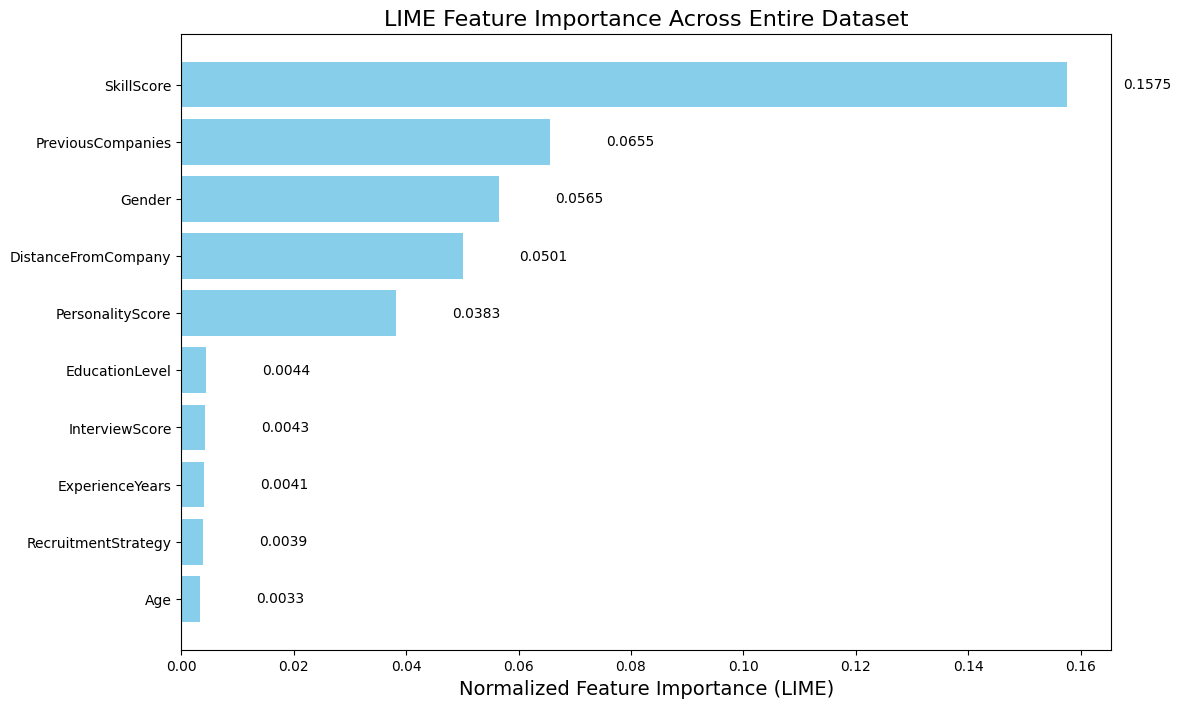


📊 **LIME Feature Importance Analysis**:

1. SkillScore: LIME Impact = 0.1575
2. PreviousCompanies: LIME Impact = 0.0655
3. Gender: LIME Impact = 0.0565
4. DistanceFromCompany: LIME Impact = 0.0501
5. PersonalityScore: LIME Impact = 0.0383
6. EducationLevel: LIME Impact = 0.0044
7. InterviewScore: LIME Impact = 0.0043
8. ExperienceYears: LIME Impact = 0.0041
9. RecruitmentStrategy: LIME Impact = 0.0039
10. Age: LIME Impact = 0.0033


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data_path = r"C:\Users\harik\Documents\PAPERPRESENTATION\SHAP AND LIME\Bias-Mitigation-using-SHAP-and-LIME-in-Recruitment-using-Machine-Learning\recruitment_data.csv"
df = pd.read_csv(data_path)

# Assuming the target column is 'HiringDecision' (adjust as needed)
X = df.drop(columns=['HiringDecision'])  # Features
y = df['HiringDecision']  # Target variable

# Set feature names explicitly as you mentioned
X.columns = ['RecruitmentStrategy', 'EducationLevel', 'SkillScore', 'PersonalityScore', 'ExperienceYears', 
             'InterviewScore', 'PreviousCompanies', 'DistanceFromCompany', 'Gender', 'Age']

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train your CatBoost model
best_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=7, cat_features=[], verbose=0)  # Adjust hyperparameters as needed
best_model.fit(X_scaled, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train, 
    training_labels=y_train, 
    feature_names=X.columns, 
    class_names=np.unique(y), 
    mode='classification'
)

# 7️⃣ Explain all instances in the test set and collect feature importances
lime_importances = np.zeros(X_test.shape[1])
predicted_targets = best_model.predict(X_test)  # Get model predictions for the test set

for i in range(len(X_test)):
    # Explain each instance using LIME
    explanation = explainer.explain_instance(X_test[i], best_model.predict_proba)
    
    # Aggregate the feature importances for the instance
    for feature_idx, weight in explanation.as_list():
        # Extract the actual feature name from the string
        feature_name = feature_idx.split(' ')[0]  # Get the feature name before the condition
        if feature_name in X.columns:
            lime_importances[X.columns.get_loc(feature_name)] += abs(weight)

    # Optionally, print the prediction for this instance
    print(f"Instance {i+1} Prediction: {predicted_targets[i]}")

# 8️⃣ Normalize the feature importances
lime_importances = lime_importances / len(X_test)

# 9️⃣ Sort the importances for better visualization
sorted_idx = np.argsort(lime_importances)[::-1]  # Sort in descending order

# 9️⃣ Create the bar plot to visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(np.array(X.columns)[sorted_idx], lime_importances[sorted_idx], color='skyblue')
plt.xlabel('Normalized Feature Importance (LIME)', fontsize=14)
plt.title('LIME Feature Importance Across Entire Dataset', fontsize=16)
plt.gca().invert_yaxis()  # To display the most important features on top

# Annotate the bars with the importance scores
for i, v in enumerate(lime_importances[sorted_idx]):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=10, color='black')

plt.show()

# 10️⃣ Output the top features with their corresponding importance scores
print("\n📊 **LIME Feature Importance Analysis**:\n")
for i, idx in enumerate(sorted_idx[:10]):  # Top 10 features
    print(f"{i+1}. {X.columns[idx]}: LIME Impact = {lime_importances[idx]:.4f}")


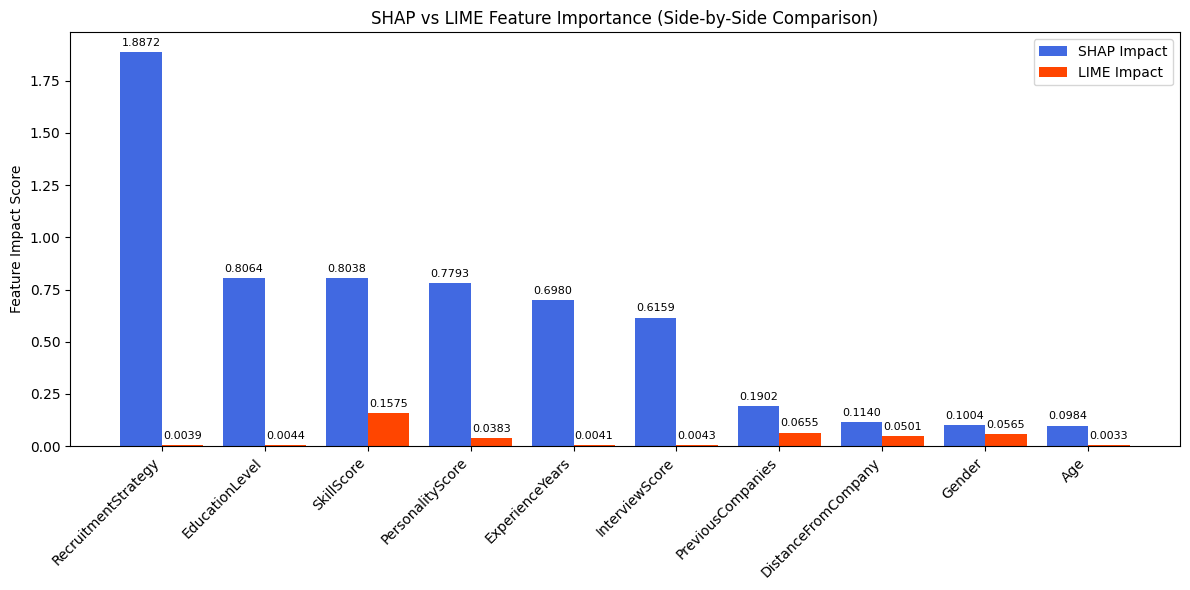


SHAP analysis shows that **RecruitmentStrategy** has the highest impact (1.8872), 
followed by **EducationLevel** (0.8064) and **SkillScore** (0.8038), making them the key drivers.

LIME assigns **SkillScore** the highest impact (0.1575), which differs significantly from SHAP. 
**PreviousCompanies**, **Gender**, and **DistanceFromCompany** also have a higher ranking in LIME compared to SHAP.
Meanwhile, **RecruitmentStrategy**, which is the top feature in SHAP, has minimal impact in LIME (0.0039). 

This suggests that SHAP is better for global model explanations, while LIME provides more localized interpretability. 
For a holistic approach, use SHAP for overall feature importance and LIME for instance-specific decisions.



In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance_side_by_side(shap_vals, lime_vals, features):
    x = np.arange(len(features))  # Feature indices
    width = 0.4  # Bar width

    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot SHAP and LIME values side by side
    bars1 = ax.bar(x - width/2, shap_vals, width, label='SHAP Impact', color='royalblue')
    bars2 = ax.bar(x + width/2, lime_vals, width, label='LIME Impact', color='orangered')

    # Add feature names as x-ticks
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Feature Impact Score')
    ax.set_title('SHAP vs LIME Feature Importance (Side-by-Side Comparison)')
    ax.legend()

    # Add value annotations
    for bars in [bars1, bars2]:
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                    f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Call the function with the provided data
plot_feature_importance_side_by_side(shap_values, lime_values, features)

# Explanation text
print(explanation)
